In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import xarray
import dask
from kruskal import daily_log_returns, compute_distance, KruskalMST

### Introduction

The KruskalMST class provides a method for computing the minimum spanning tree of a network according to Kruskal's algorithm. The class takes as input, a pandas dataframe as a constructor. Upon initialization, the graph is constructed by iterating through the i,j indexes of the dataframe and adding new edges with distances. Edges are only added if they do not exist. All nodes are connected to edges since we have a symmetrical matrix. 

KruskalMST draws heavily on networkX's implementation of min spanning tree. Upon deeper analysis, the networkx implementation itself is built on a Unionfind data structure found in other python implementations. 

IO and distance computation are not functions built into the class but are methods available upon import of the module. 



Create a list of tickers that you want to consider
* The 'daily_log_returns' function takes a list
* This function will perform the API call to yfinance and compute log returns on daily close for each ticker
* Individual tickers are concatenated into larger df

In [2]:

shares = ['USCI', 'GLD', 'TLT', 'VXX', 'SPY']

#### Compute the daily log returns on close for the shares in our universe

In [3]:
returns_df = daily_log_returns(shares)

In [4]:
returns_df.tail()

,log_return_USCI,log_return_GLD,log_return_TLT,log_return_VXX,log_return_SPY
Date,,,,,
2020-03-02,0.019689,0.005511,-0.007378,-0.034794,0.042395
2020-03-03,0.006582,0.030950,0.015406,0.104225,-0.029050
2020-03-04,-0.004383,0.001753,-0.010675,-0.061136,0.041174
2020-03-05,-0.012630,0.021371,0.024587,0.148420,-0.033807
2020-03-06,-0.024121,0.000381,0.050735,0.111265,-0.016669


#### Compute distance matrix for the returns in our universe
* The correlation method used here is Pearson, the default method from pandas.

In [5]:
distance_matrix = compute_distance(returns_df)

In [6]:
distance_matrix

,log_return_USCI,log_return_GLD,log_return_TLT,log_return_VXX,log_return_SPY
log_return_USCI,0.000000,1.147153,1.576177,1.644134,1.081592
log_return_GLD,1.147153,0.000000,1.316910,1.395006,1.399472
log_return_TLT,1.576177,1.316910,0.000000,1.106574,1.678964
log_return_VXX,1.644134,1.395006,1.106574,0.000000,1.901607
log_return_SPY,1.081592,1.399472,1.678964,1.901607,0.000000


#### We construct a Graph object
*  `KruskalMST` class is simply a` networkx` `Graph` object with Vertices and Edges
* When a matrix is given to the constructor, edges and vertices are added  for every edge `(i,j)` in the matrix 


In [7]:
g = KruskalMST(distance_matrix)

#### We call `min_span_tree` method on the graph object
* This method finds the minimum spanning tree of the graph object
* `min_span_tree` calls a private method `min_span_edges` that finds the minimum spanning edges of graph

In [8]:
T = g.min_span_tree()

#### Let's have a look at our graph edges 
*` Networkx` is a great library for doing graph analysis. Lots of useful attrs on the `Graph` object

In [9]:
T.edges()

EdgeView([('log_return_USCI', 'log_return_GLD'), ('log_return_GLD', 'log_return_SPY'), ('log_return_GLD', 'log_return_TLT'), ('log_return_GLD', 'log_return_VXX')])

#### We can use networkx to visualize the network structure

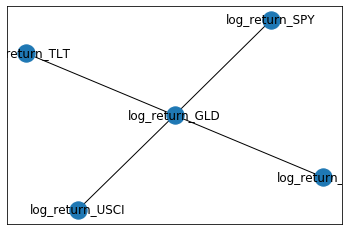

In [10]:
import networkx 
networkx.draw_networkx(T)

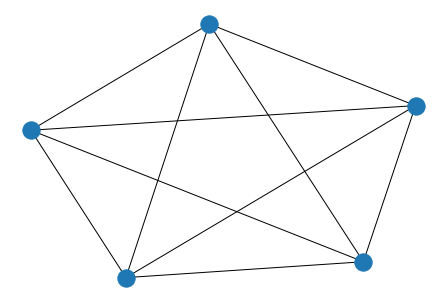

In [11]:
networkx.draw(g.graph)
